# Exercise Session 1 - Brownian Motion

In [3]:
using Random, Distributions, Plots, BenchmarkTools

## Brownian Motion generation

Consider a scalar standard Brownian motion (Wiener process) on [0, 1]

In [4]:
Random.seed!(1234)

TaskLocalRNG()

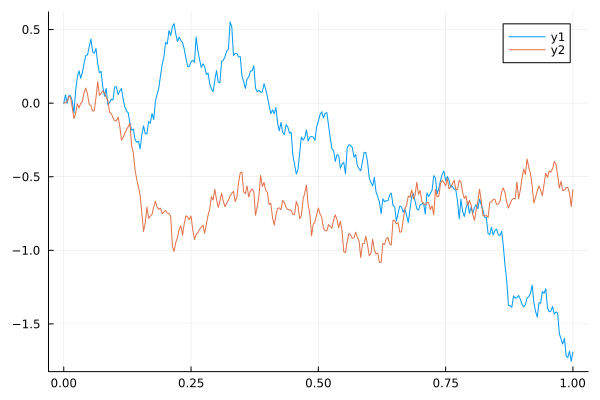

In [5]:
# For loop version
function std_BM_loop(n::Int64,T::Float64)
    dt = T/n
    W = zeros(n+1)
    dW = sqrt(dt)*randn(n)
    W[1] = 0.0
    for i in 2:n+1
        W[i] = W[i-1] + dW[i-1]
    end
    return W
end

# cumsum version
function std_BM_cum(n::Int64,T::Float64)
    dt = T/n
    dW = sqrt(dt)*randn(n)
    W = [0;cumsum(dW)]
    return W
end

function std_BM_cum_dt(dt::Float64,T::Float64)
    n = Int(T/dt)
    dW = sqrt(dt)*randn(n)
    W = [0;cumsum(dW)]
    return W
end

n = 300
T = 1.0
dt = T/n
W1 = std_BM_cum(n,T)
W2 = std_BM_loop(n,T)

x_plot = 0:dt:T
plot(x_plot,[W1,W2])

[16, 64, 256]
dt: 0.0625 nsim :20 done
dt: 0.0625 nsim :200 done
dt: 0.0625 nsim :2000 done
dt: 0.0625 nsim :20000 done
dt: 0.015625 nsim :20 done
dt: 0.015625 nsim :200 done
dt: 0.015625 nsim :2000 done
dt: 0.015625 nsim :20000 done
dt: 0.00390625 nsim :20 done
dt: 0.00390625 nsim :200 done
dt: 0.00390625 nsim :2000 done
dt: 0.00390625 nsim :20000 done


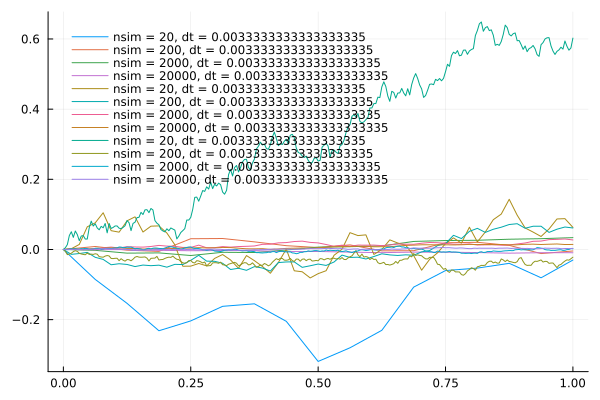

In [ ]:
dt_list = [2^(-4),2^(-6),2^(-8)]
n_list = [16,64,256]
println(n_list)
N_sim = [20,200,2000,20000] #[20, 200, 2000,20000,200000,5000000]
T = 1.0

function simulation_BM(N_sim::Vector,T::Float64,n::Int64)
    # Returns a N_sim*dt_list*n array
    output = zeros(n+1,length(N_sim))
    for (i,N) = enumerate(N_sim)
        for k = 1:N
            output[:,i] += std_BM_cum(n,T)
        end
        output[:,i] /= N
        println("dt: "*string(T/n)*" nsim :"*string(N)*" done")
    end
    return output
end

p = plot(foreground_color_legend = nothing,background_color_legend = nothing)
for (idx,n) = enumerate(n_list)
   y = simulation_BM(N_sim,T,n)
   for i_sim = 1:length(N_sim)
       plot!(0:dt_list[idx]:T,y[:,i_sim],label="nsim = "*string(N_sim[i_sim])*", dt = "* string(T/n))
   end
end
p

dt: 0.0625 nsim :20 done
dt: 0.0625 nsim :200 done
dt: 0.0625 nsim :2000 done
dt: 0.0625 nsim :20000 done
dt: 0.015625 nsim :20 done
dt: 0.015625 nsim :200 done
dt: 0.015625 nsim :2000 done
dt: 0.015625 nsim :20000 done
dt: 0.00390625 nsim :20 done
dt: 0.00390625 nsim :200 done
dt: 0.00390625 nsim :2000 done
dt: 0.00390625 nsim :20000 done
plot of means

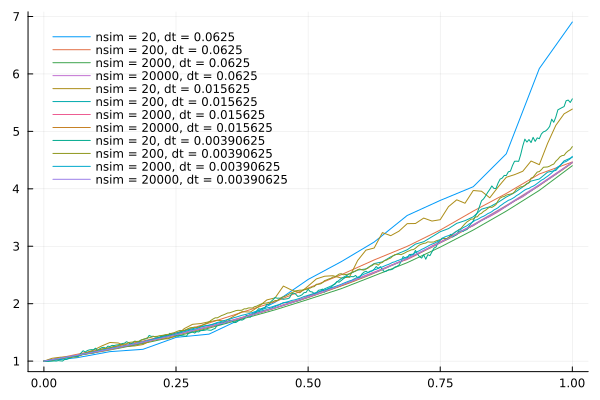

In [5]:
λ = 2; μ = 1; X_0 = 1
T = 1.0
dt_list = [2^(-4),2^(-6),2^(-8)]
n = Array{Int}(undef, length(dt_list))
    
p = plot(foreground_color_legend = nothing,
         background_color_legend = nothing)
for (idx,n) = enumerate(n_list)
   BM = simulation_BM(N_sim,T,n)
   for i_sim = 1:length(N_sim)
       y = X_0*exp.((λ-0.5*μ^2)*(0:T/n:T)+μ*BM[:,i_sim])
       plot!(0:dt_list[idx]:T,y,label="nsim = "*string(N_sim[i_sim])*", dt = "* string(T/n))
   end
end
print("plot of means")
p

## Solving stochastic differential equations
$dX(t) = \lambda X(t)dt + \mu X(t)dW(t), 0 \le t \le T \\$
$X(0) = X_0$

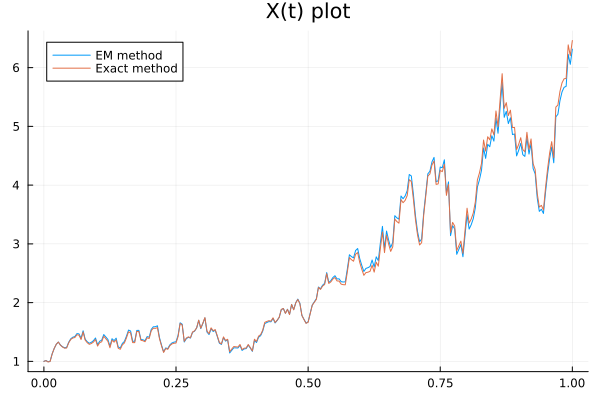

In [6]:
λ = 2.0; μ = 1.0; X_0 = 1.0
dt = 2^(-8)
T = 1.0
n = Int(T/dt)
BM = std_BM_cum(n,T)

function EM_method(n::Int64,dt::Float64,λ::Float64,μ::Float64,X_0::Float64,BM::Vector)
    X_EM = zeros(n+1)
    X_EM[1] = X_0
    for i in 2:n+1
       X_EM[i] = X_EM[i-1]+λ*X_EM[i-1]*dt+μ*X_EM[i-1]*(BM[i]-BM[i-1]) 
    end
    return X_EM
end

X_EM = EM_method(n,dt,λ,μ,X_0,BM)

X_exact = X_0*exp.((λ-0.5*μ^2)*(0:dt:T)+μ*BM)

plot(0:dt:1,[X_EM,X_exact],title="X(t) plot", label=["EM method" "Exact method"])

## Strong order convergence
$dX(t) = \lambda X(t)dt + \mu X(t)dW(t), 0 \le t \le T \\$
$X(0) = X_0$

In [8]:
M = Int(1e5); T = 1.0; dt = 2^(-10); n = Int(T/dt)
dt_list = 2 .^ [1,2,3,4,5] * dt
tot_error = zeros(length(dt_list))
for (idx,dt_) = enumerate(dt_list)
    err = 0.0
    for i = 1:M
        BM = std_BM_cum_dt(dt_,T)
        exact_sol = X_0*exp((λ-0.5*μ^2)*T+μ*BM[end])
        X = EM_method(Int(T/dt_),dt_,λ,μ,X_0,BM)
        err += abs(exact_sol-X[end])
    end
    tot_error[idx] = err/M
end

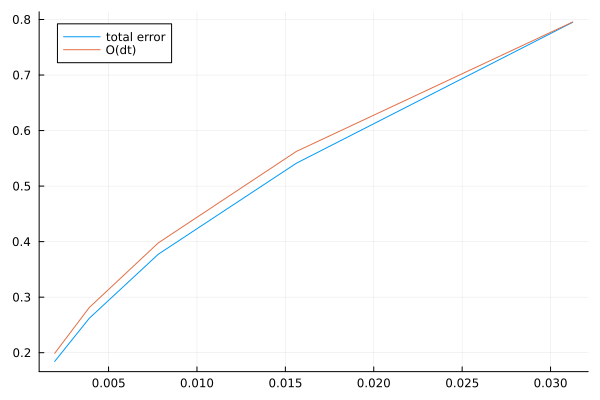

In [23]:
plot(dt_list,[tot_error,4.5*dt_list.^(0.5)],label=["total error" "O(dt)"])